# **LIME HANDS-ON** 

# Explanations for image classification 

## Importing libraries 

In [ ]:
!pip install lime

     |████████████████████████████████| 276kB 7.0MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp37-none-any.whl size=283858 sha256=85988bbc143646e1eb5b6d8c0ce17d04021b3002c9a612e4739fdb61f5034a06
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%cd /gdrive/My Drive/Colab Notebooks
path = '/gdrive/My Drive/Colab Notebooks'

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread
## EXAMPLE OF IMPORT FOR USING AN INCEPTION V3 NEURAL NETWORK
import keras
from keras.preprocessing import image
from keras.applications import inception_v3
from keras.applications.imagenet_utils import decode_predictions
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries

## Defining a function to preprocess image

#### <span style="color:blue">Write code here!</span>

In [ ]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inception_v3.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

## Build you ML model

#### <span style="color:blue">Write code here!</span>

In [ ]:
## EXAMPLE
net_model = inception_v3.InceptionV3()

96124928/96112376 [==============================] - 1s 0us/step


## Visualize image after preprocess it

#### <span style="color:blue">Write code here!</span>

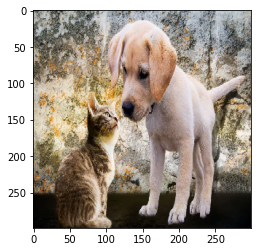

In [ ]:
images = transform_img_fn([os.path.join('cat_dog.jpg')])
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
plt.imshow(images[0] / 2 + 0.5)

## Get preditions

Let's see the Top-5 predictions for some image  

#### <span style="color:blue">Write code here!</span>

In [ ]:
preds = net_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

49152/35363 [=========================================] - 0s 0us/step
('n02099712', 'Labrador_retriever', 0.3846498)
('n02088364', 'beagle', 0.032976184)
('n02123045', 'tabby', 0.025716066)
('n02123159', 'tiger_cat', 0.018768448)
('n02124075', 'Egyptian_cat', 0.018219478)


## Explanable model 

#### <span style="color:blue">Write code here!</span>

In [ ]:
explainer = lime_image.LimeImageExplainer()

#CPU 2m15s
#GPU 16s

In **_explain instance_** method below, _hide color_ is the color for a superpixel turned OFF (0 means gray).

Alternatively, if it is _None_, the superpixel will be replaced by the average of its pixels.

#### <span style="color:blue">Write code here!</span>

In [ ]:

explanation = explainer.explain_instance(images[0].astype('double'), net_model.predict, top_labels=5, hide_color=0, num_samples=1000)

## Explanable interface 

Get label name 

We can see the superpixels that are most positive towards the class, in different views:

#### **1.** With the rest of the image hidden

#### <span style="color:blue">Write code here!</span>

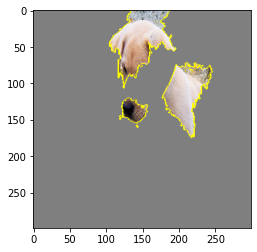

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

#### **2.** With the rest of the image present 

#### <span style="color:blue">Write code here!</span> 

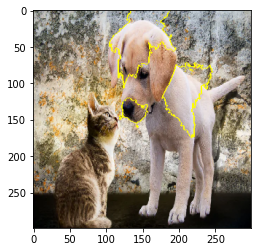

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

#### **3.** With positive and negative contributes in the whole image

#### <span style="color:blue">Write code here!</span>

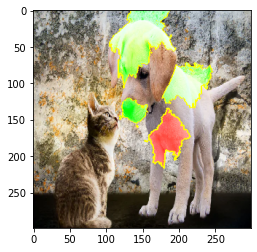

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

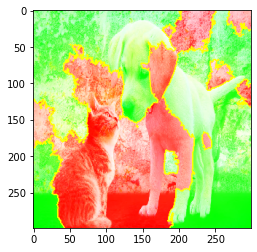

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=1000, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

#### **4.** With positive and negative contributes that have weight at least 0.1

#### <span style="color:blue">Write code here!</span>

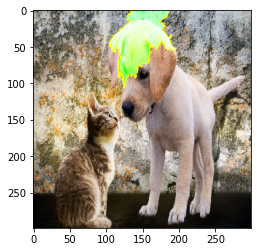

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.1)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))